In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import glob

## [VOC dataset]

 - Segmentation 용 라벨이 달린 파일은 
 > Train : 17125 중 2913
 
 > Test에도 Segmentaion 있다고는 하는데 현재 받은 파일에는 없음. (추후 해결 )
 
     -> 일단 **Train 용 데이터만 사용**
     
     
 - SegmentationClass에 있는 파일 만 사용 (2913)
 
    - 이 곳에 있는 파일은 Grayscale로 읽었을 때, 
       - 값 220 : 테두리 :  다만 테두리는 모든 클래스에 동일하게 들어가있으므로 고려할 수 없다. 
       - 값 147 : 사람의 segment
       - 그 이외의 값은 그냥 그레이 스케일

In [139]:
voc12_img_path = "/Users/hyunkim/Downloads/voc/VOCdevkit_Train/VOC2012/JPEGImages/"
img_list = os.listdir(voc12_img_path)

In [34]:
voc12_cls_path = "/Users/hyunkim/Downloads/voc/VOCdevkit_Train/VOC2012/SegmentationClass/"
seg_cls_list = os.listdir(voc12_cls_path)

In [150]:
seg_cls_list[11][:-3] + "jpg"

'2008_002425.jpg'

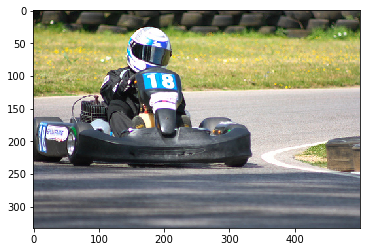

In [151]:
sample_img = cv2.imread(os.path.join(voc12_img_path, seg_cls_list[11][:-3] + "jpg"), cv2.IMREAD_COLOR)
plt.imshow(sample_img[:,:,::-1])

(array([  0,  38, 147, 220], dtype=uint8), array([72109, 72546,  6154, 15191]))


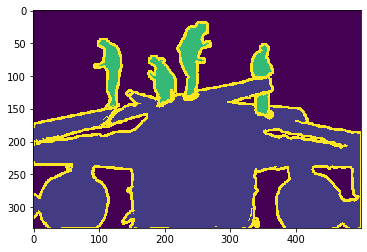

In [161]:
# sample = cv2.imread(os.path.join(voc12_cls_path, seg_cls_list[2]))
# 사람 147, 테두리 220
sample = cv2.imread(os.path.join(voc12_cls_path, seg_cls_list[3]), cv2.IMREAD_GRAYSCALE)
print(np.unique(sample, return_counts=True))
plt.imshow(sample)

In [163]:
def filter_segment(img_arr):
    img = img_arr.copy()
    img[(img != 147) & (img != 220)] = 0
    img[(img == 147) | (img == 220)] = 255
    return img

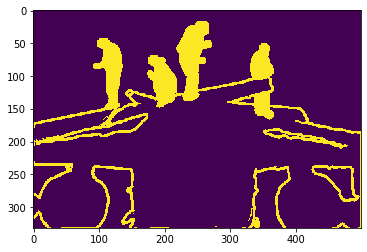

In [164]:
plt.imshow(sample)
plt.imshow(filter_segment(sample))

### File Filtering 

 1. 먼저 사람 클래스가 있는 이미지인지 확인 ... check_human_existance() return Bool
 2. 사람 클래스 부분의 비율이 전체 이미지 중 25%를 넘는가? ... check_proportion(threshold) return Bool 
 3. 위 조건을 모두 만족하면, 사람에 해당 하는 부분만 1 나머지는 0으로 변환 후 
 4. 아래 데이터 구조로 쌓음.

     - dataset
         - voc
            - train
               - {id}.jpg
               - {id}_seg.png

     

In [206]:
import shutil

In [203]:
voc12_img_path = "/Users/hyunkim/Downloads/voc/VOCdevkit_Train/VOC2012/JPEGImages/"
voc12_seg_path = "/Users/hyunkim/Downloads/voc/VOCdevkit_Train/VOC2012/SegmentationClass/"


def check_human_existance(img_arr):
    
    return 147 in np.unique(img_arr)

def check_proportion(img_arr, threshold=0.25):
    
    u, c = np.unique(img_arr, return_counts=True)

    return dict(zip(*(u, c)))[147] / sum(c) > threshold

def image_threshold(img_arr):
    
    img = img_arr.copy()
    img[(img != 147) & (img != 220)] = 0
    img[(img == 147) | (img == 220)] = 255
    
    return img

def save_data(img_arr, img_id, target_dir):
    
    cv2.imwrite(os.path.join(target_dir, img_id + ".jpg"), img_arr)

    return None
    
def copy_data(data, target_dir):
    assert os.path.exists(os.path.join(target_dir, data.split("/")[-1]))
    shutil.copy(data, target_dir)
    print()
    return None

def voc_filter_main(name, target_dir):
    """
    """
    path = os.path.join(voc12_seg_path, name)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if check_human_existance(img):
        if check_proportion(img):
            print(name)
            # label
            save_data(image_threshold(img), name.split(".")[0], target_dir)
            # image
            copy_data(target_dir)
            
    
    print(seg_img)
    
    
    return None


SyntaxError: invalid syntax (<ipython-input-203-db1f28afc008>, line 24)

In [202]:
check_human_existance(sample), check_proportion(sample)

(True, False)

In [ ]:
for mat in mat_list:
    mask = scipy.io.loadmat(mat)
    filename = mat.split("/")[-1][:-3]
    cv2.imwrite("./data/uv_mask/" + filename + "jpg", mask['mask']*255)